# US Police Shootings Project

For this project you have to analyze some  police shootings data from [Kaggle](https://www.kaggle.com/ahsen1330/us-police-shootings). 

#### 1. Import numpy and pandas

In [1]:
import pandas as pd
import numpy as np

#### 2. Import seaborn

In [2]:
import seaborn as sns

#### 3. Import pyplot from matplotlib and write the code which allows to show plots in jupiter notebook 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#### 4. Create a variable and read data from csv file in it

In [4]:
usps = pd.read_csv('shootings.csv')

#### 5. Show first 10 rows from the dataset

In [5]:
usps.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


#### 6. What are the top 10 shootings cities?

In [6]:
usps['city'].value_counts().head(10)

Los Angeles     78
Phoenix         66
Houston         51
Las Vegas       41
San Antonio     40
Chicago         38
Columbus        36
Albuquerque     32
Jacksonville    31
St. Louis       30
Name: city, dtype: int64

#### 7. What are the top 10 shootings states?

In [7]:
usps['state'].value_counts().head(10)

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
Name: state, dtype: int64

#### 8. How many unique arms categories are there?

In [8]:
len(pd.unique(usps['arms_category']))

12

#### 9. In the name column there are "First name | Last name" specified. Use .apply() with a custom lambda expression to create a new column called "first_name" that contains only first name values. For example, if the name column value is "Tim Elliot" , the first_name column value would be "Tim".

In [9]:
usps['first_name'] = usps['name'].apply(lambda first_name: first_name.split(' ')[0])

#### 10. What is the most common first name based off of this new column?

In [41]:
usps['first_name'].value_counts()

Michael        142
David           84
Robert          79
James           79
Christopher     71
              ... 
Talif            1
Cleotha          1
Abdul            1
Irecas           1
Caine            1
Name: first_name, Length: 1510, dtype: int64

#### 11. Use seaborn to create a countplot of shootings by race.

<Axes: xlabel='race', ylabel='count'>

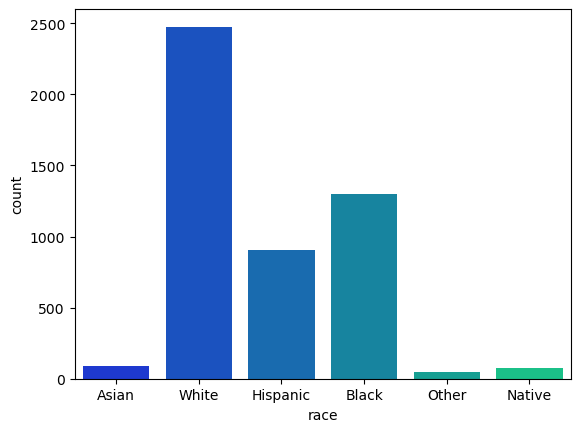

In [11]:
sns.countplot(x='race',data = usps, palette='winter')

#### 12. What is the data type of the objects in the date column?

In [12]:
type(usps['date'][0])

str

#### 13. You should have seen that these dates are strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

In [13]:
usps['date'] = pd.to_datetime(usps['date'])

#### 14. Now in the date column are actually DateTime objects. Use .apply() to create 3 new columns called year, month, and day. You have to create these columns based off of the date column.

In [14]:
usps['year'] = usps['date'].apply(lambda year: year.year)
usps['month'] = usps['date'].apply(lambda month: month.month)
usps['day'] = usps['date'].apply(lambda day: day.day)

#### 15. Use seaborn to create a countplot of the month column with the hue based off of the race column. 

<Axes: xlabel='month', ylabel='count'>

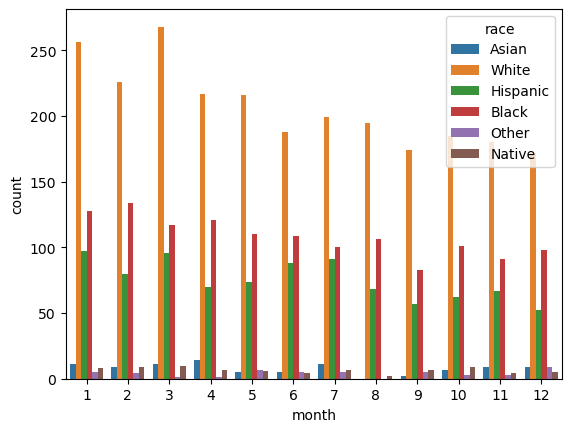

In [17]:
sns.countplot(x='month',data = usps, hue='race')

#### 16. Relocate the legend out of the plot on the top right side

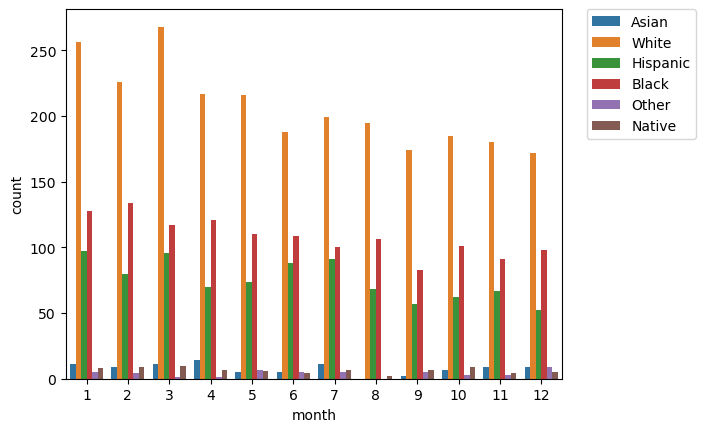

In [18]:
sns.countplot(x='month',data = usps, hue='race')
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

#### 17. Now do the same for year column

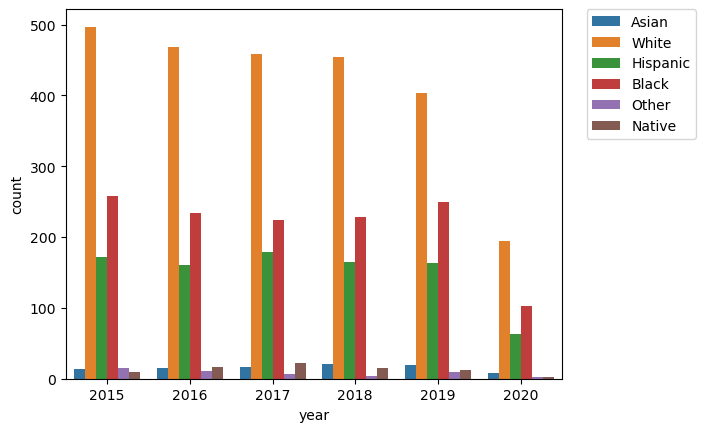

In [19]:
sns.countplot(x='year',data = usps, hue='race')
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

#### 18. Create a groupby object called by_year, where you group the DataFrame by the year column and use the count() method for aggregation. Use the head() method on this returned DataFrame. 

In [36]:
by_year = usps.groupby('year').count()
by_year

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,first_name,month,day
year,,,,,,,,,,,,,,,,,,
2015,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965
2016,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904
2017,906,906,906,906,906,906,906,906,906,906,906,906,906,906,906,906,906,906
2018,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888
2019,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858
2020,374,374,374,374,374,374,374,374,374,374,374,374,374,374,374,374,374,374


#### 19. Create a simple plot based off of by_year variable indicating the shootings per year. You can use any column for this

<Axes: xlabel='year'>

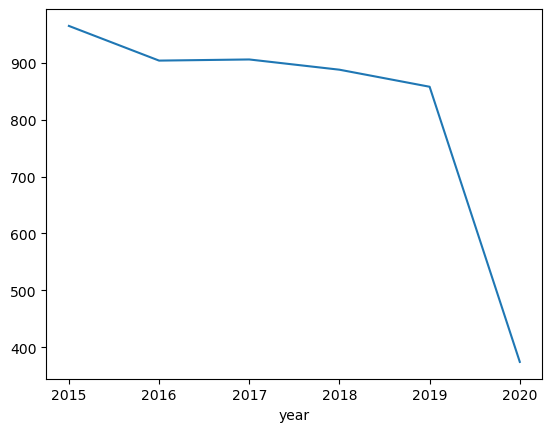

In [21]:
by_year['id'].plot()

#### 20. Use seaborn's lmplot() to create a linear fit on the number of shootings per year using by_year variable. Keep in mind you may need to reset the index to a column.

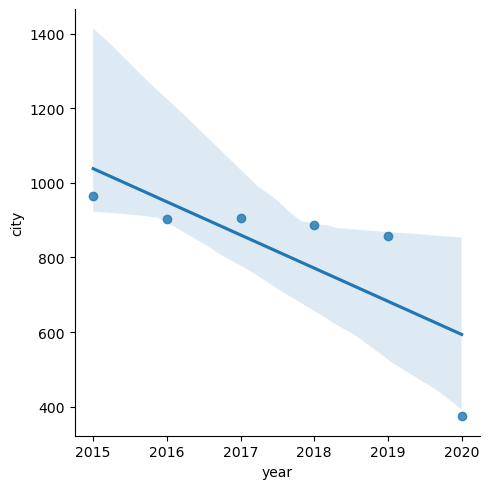

In [22]:
by_year = by_year.reset_index()
sns.lmplot(x='year', y='city', data = by_year)

#### 21. Use groupby() for date column with the count() aggregate and create a plot of counts of shootings.

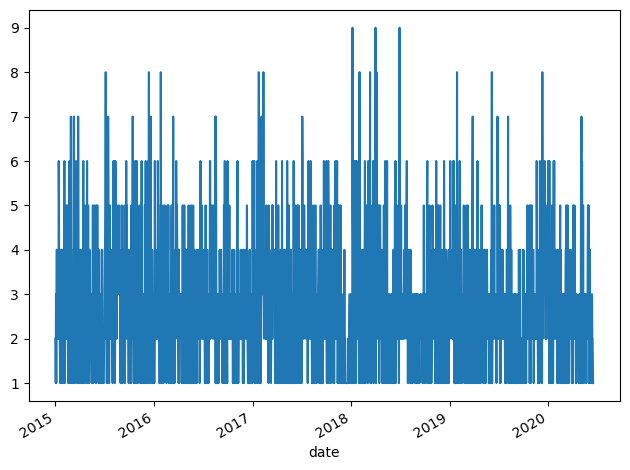

In [23]:
by_date = usps.groupby('date').count()['city'].plot()
plt.tight_layout()

#### 22. What is the most common manner of death? 

In [24]:
usps['manner_of_death'].value_counts()

shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

#### 23. Now recreate previous plot but create 2 separate plots with each plot representing one manner of death

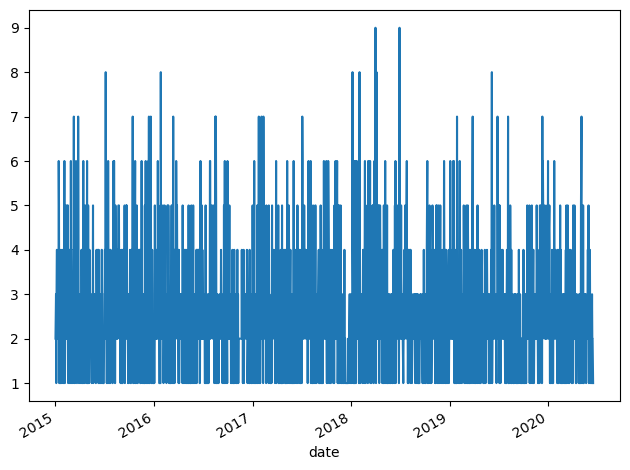

In [25]:
by_date = usps[usps['manner_of_death'] == 'shot'].groupby('date').count()['city'].plot()
plt.tight_layout()

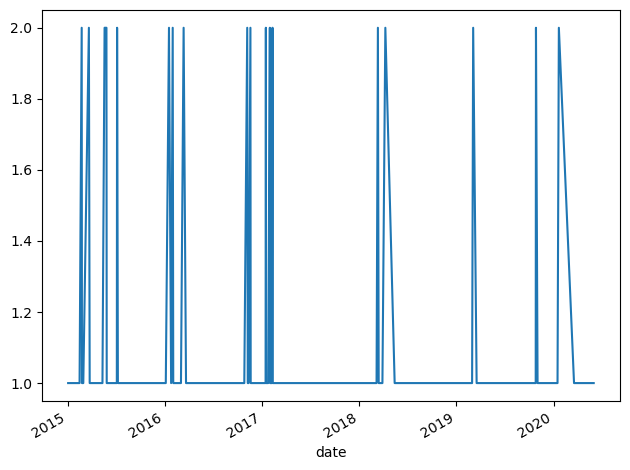

In [26]:
by_date = usps[usps['manner_of_death'] == 'shot and Tasered'].groupby('date').count()['city'].plot()
plt.tight_layout()

#### 24. Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the months and the indices become the days. There are lot of ways to do this, but I would recommend trying to combine groupby with an unstack method.

In [45]:
month_day = usps.groupby(['day', 'month']).count()['manner_of_death'].unstack()
month_day.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,15.0,16.0,15.0,19.0,12.0,13.0,15.0,18.0,13.0,14.0,11.0,16.0
2,16.0,13.0,17.0,11.0,11.0,14.0,9.0,13.0,6.0,10.0,9.0,15.0
3,11.0,20.0,8.0,11.0,19.0,18.0,20.0,16.0,14.0,5.0,8.0,5.0
4,16.0,21.0,14.0,15.0,11.0,8.0,18.0,12.0,11.0,11.0,19.0,6.0
5,22.0,13.0,18.0,18.0,15.0,14.0,24.0,21.0,12.0,15.0,19.0,16.0


#### 25. Now create a heatmap using this dataframe

<Axes: xlabel='month', ylabel='day'>

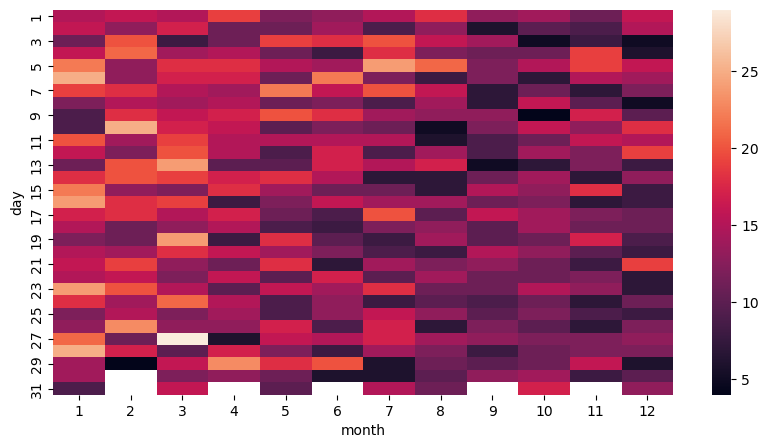

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(month_day, cmap='rocket')

### That's all for this section. Great job!